In [3]:
import logging
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import RandomState
from sklearn import cluster, decomposition
from sklearn.datasets import fetch_olivetti_faces
from skimage import color
from skimage.transform import resize
from skimage.io import imread

In [4]:
rng = RandomState(0)

# 在stdout上显示进度日志
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape

In [5]:
# 全局中心化（聚焦于一个特征，中心化所有样本）
faces_centered = faces - faces.mean(axis=0)

In [6]:
# 局部中心化（聚焦于一个样本，中心化所有特征）
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("数据集包含 %d 张人脸" % n_samples)

数据集包含 400 张人脸


In [8]:
# 定义一个基础函数来绘制人脸画廊。
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)

def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages

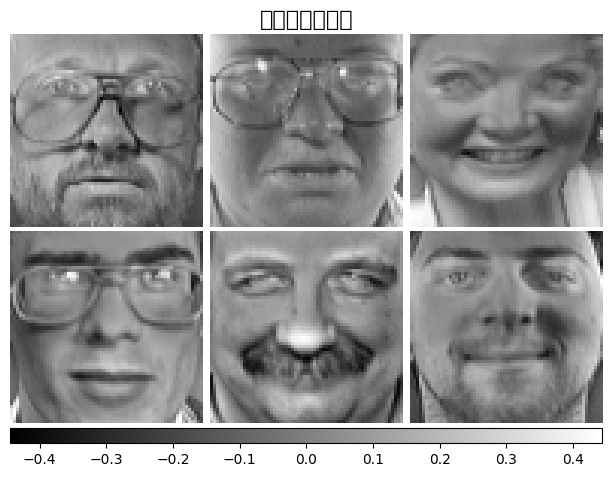

In [9]:
# 看看我们的数据。灰色表示负值，白色表示正值。
plot_gallery("数据集中的人脸", faces_centered[:n_components])

C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20351 (\N{CJK UNIFIED IDEOGRAPH-4F7F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages

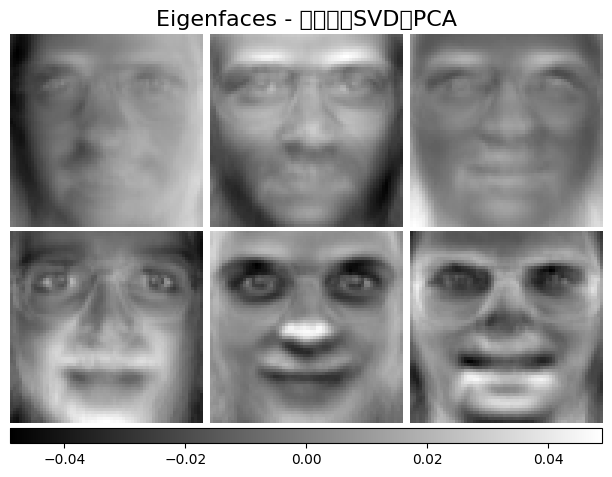

In [10]:
# 分解

# Eigenfaces - 使用随机SVD的PCA
pca_estimator = decomposition.PCA(
    n_components=n_components, svd_solver="randomized", whiten=True
)
pca_estimator.fit(faces_centered)
plot_gallery(
    "Eigenfaces - 使用随机SVD的PCA", pca_estimator.components_[:n_components]
)

C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38750 (\N{CJK UNIFIED IDEOGRAPH-975E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36127 (\N{CJK UNIFIED IDEOGRAPH-8D1F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


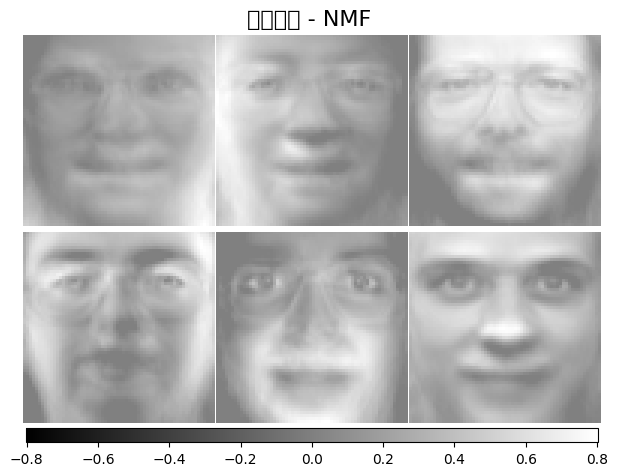

In [11]:
# 非负成分 - NMF
nmf_estimator = decomposition.NMF(n_components=n_components, tol=5e-3)
nmf_estimator.fit(faces)  # 原始非负数据集
plot_gallery("非负成分 - NMF", nmf_estimator.components_[:n_components])

C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29420 (\N{CJK UNIFIED IDEOGRAPH-72EC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31435 (\N{CJK UNIFIED IDEOGRAPH-7ACB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


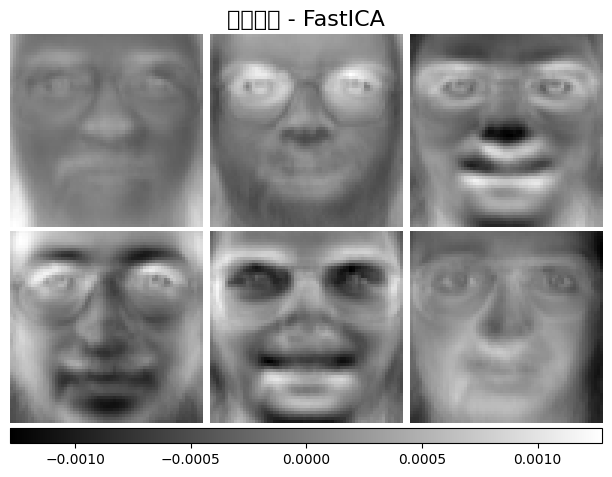

In [12]:
# 独立成分 - FastICA
ica_estimator = decomposition.FastICA(
    n_components=n_components, max_iter=400, whiten="arbitrary-variance", tol=15e-5
)
ica_estimator.fit(faces_centered)
plot_gallery(
    "独立成分 - FastICA", ica_estimator.components_[:n_components]
)

C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31232 (\N{CJK UNIFIED IDEOGRAPH-7A00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30095 (\N{CJK UNIFIED IDEOGRAPH-758F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


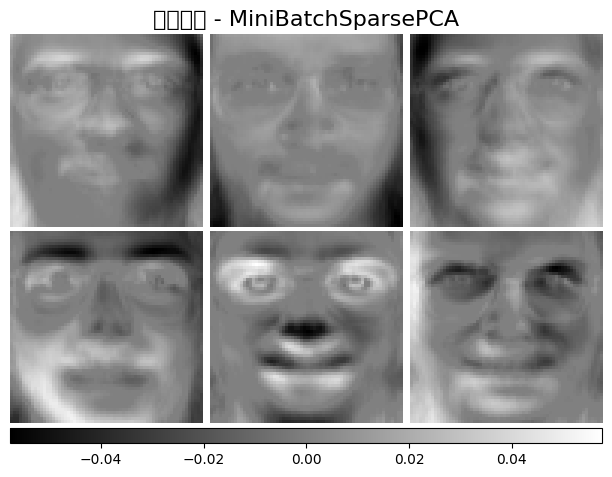

In [13]:
# 稀疏成分 - MiniBatchSparsePCA
batch_pca_estimator = decomposition.MiniBatchSparsePCA(
    n_components=n_components, alpha=0.1, max_iter=100, batch_size=3, random_state=rng
)
batch_pca_estimator.fit(faces_centered)
plot_gallery(
    "稀疏成分 - MiniBatchSparsePCA",
    batch_pca_estimator.components_[:n_components],
)

C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20856 (\N{CJK UNIFIED IDEOGRAPH-5178}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20064 (\N{CJK UNIFIED IDEOGRAPH-4E60}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


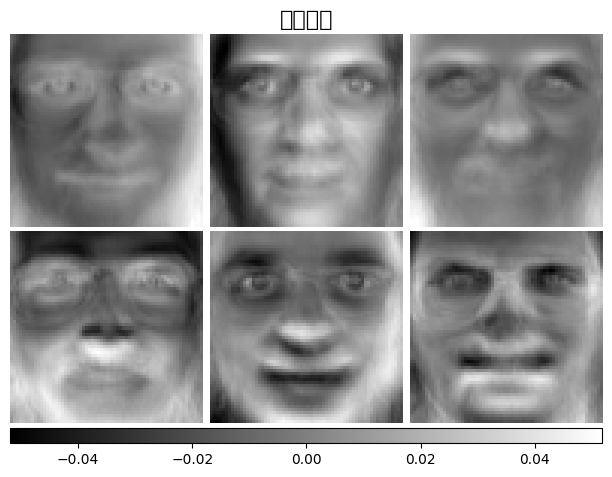

C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C

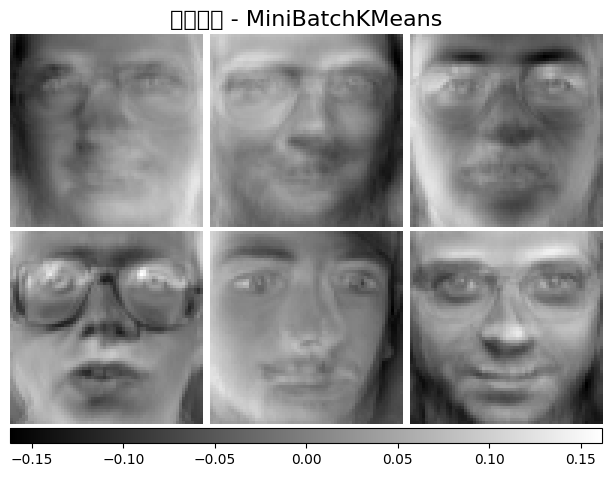

In [14]:
# 字典学习
batch_dict_estimator = decomposition.MiniBatchDictionaryLearning(
    n_components=n_components, alpha=0.1, max_iter=50, batch_size=3, random_state=rng
)
batch_dict_estimator.fit(faces_centered)
plot_gallery("字典学习", batch_dict_estimator.components_[:n_components])

# 聚类中心 - MiniBatchKMeans
kmeans_estimator = cluster.MiniBatchKMeans(
    n_clusters=n_components,
    tol=1e-3,
    batch_size=20,
    max_iter=50,
    random_state=rng,
)
kmeans_estimator.fit(faces_centered)
plot_gallery(
    "聚类中心 - MiniBatchKMeans",
    kmeans_estimator.cluster_centers_[:n_components],
)

C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22240 (\N{CJK UNIFIED IDEOGRAPH-56E0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26512 (\N{CJK UNIFIED IDEOGRAPH-6790}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


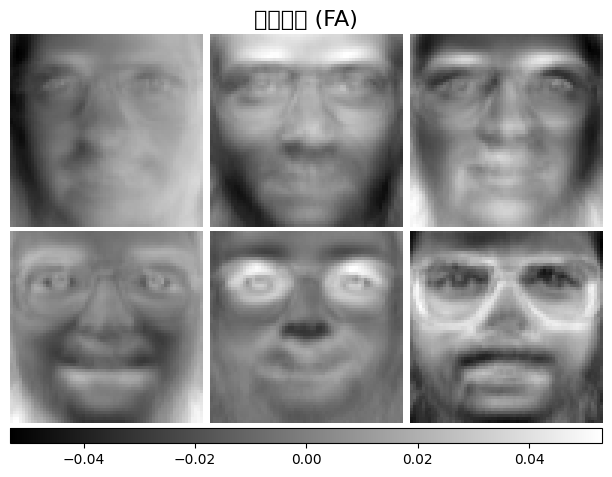

C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32032 (\N{CJK UNIFIED IDEOGRAPH-7D20}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages

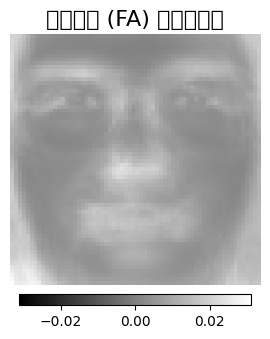

C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages

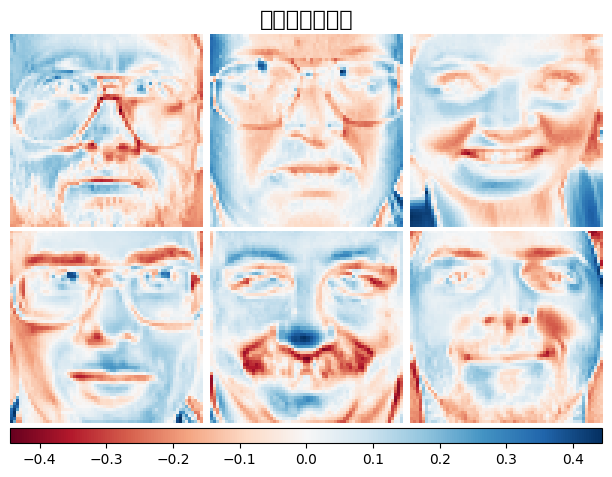

In [15]:
# 因子分析成分 - FA
fa_estimator = decomposition.FactorAnalysis(n_components=n_components, max_iter=20)
fa_estimator.fit(faces_centered)
plot_gallery("因子分析 (FA)", fa_estimator.components_[:n_components])

# 像素方差
plt.figure(figsize=(3.2, 3.6), facecolor="white", tight_layout=True)
vec = fa_estimator.noise_variance_
vmax = max(vec.max(), -vec.min())
plt.imshow(
    vec.reshape(image_shape),
    cmap=plt.cm.gray,
    interpolation="nearest",
    vmin=-vmax,
    vmax=vmax,
)
plt.axis("off")
plt.title("因子分析 (FA) 的像素方差", size=16, wrap=True)
plt.colorbar(orientation="horizontal", shrink=0.8, pad=0.03)
plt.show()

# 使用另一种颜色映射绘制我们数据集中的相同样本。
# 红色表示负值，蓝色表示正值，白色表示零。
plot_gallery("数据集中的人脸", faces_centered[:n_components], cmap=plt.cm.RdBu)

C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20856 (\N{CJK UNIFIED IDEOGRAPH-5178}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20064 (\N{CJK UNIFIED IDEOGRAPH-4E60}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages

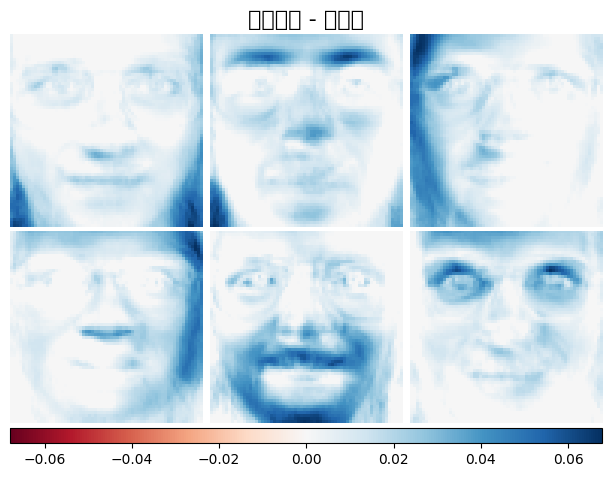

In [16]:
# 字典学习 - 正字典
dict_pos_dict_estimator = decomposition.MiniBatchDictionaryLearning(
    n_components=n_components,
    alpha=0.1,
    max_iter=50,
    batch_size=3,
    random_state=rng,
    positive_dict=True,
)
dict_pos_dict_estimator.fit(faces_centered)
plot_gallery(
    "字典学习 - 正字典",
    dict_pos_dict_estimator.components_[:n_components],
    cmap=plt.cm.RdBu,
)

C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20856 (\N{CJK UNIFIED IDEOGRAPH-5178}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20064 (\N{CJK UNIFIED IDEOGRAPH-4E60}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages

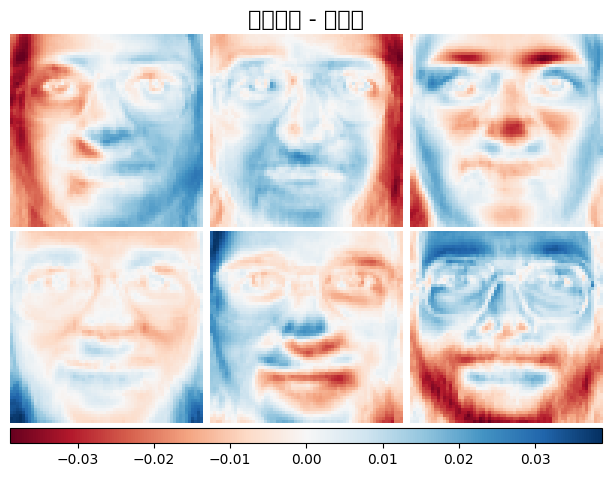

In [17]:
# 字典学习 - 正编码
dict_pos_code_estimator = decomposition.MiniBatchDictionaryLearning(
    n_components=n_components,
    alpha=0.1,
    max_iter=50,
    batch_size=3,
    fit_algorithm="cd",
    random_state=rng,
    positive_code=True,
)
dict_pos_code_estimator.fit(faces_centered)
plot_gallery(
    "字典学习 - 正编码",
    dict_pos_code_estimator.components_[:n_components],
    cmap=plt.cm.RdBu,
)

C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20856 (\N{CJK UNIFIED IDEOGRAPH-5178}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20064 (\N{CJK UNIFIED IDEOGRAPH-4E60}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\20887\AppData\Local\Programs\Python\Python311\Lib\site-packages

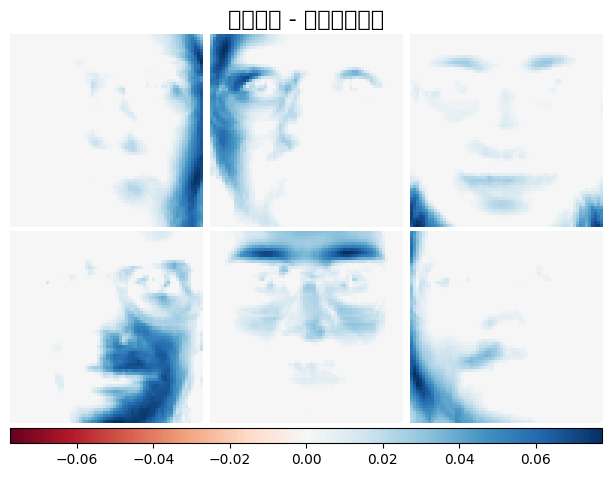

In [18]:
# 字典学习 - 正字典和编码
dict_pos_estimator = decomposition.MiniBatchDictionaryLearning(
    n_components=n_components,
    alpha=0.1,
    max_iter=50,
    batch_size=3,
    fit_algorithm="cd",
    random_state=rng,
    positive_dict=True,
    positive_code=True,
)
dict_pos_estimator.fit(faces_centered)
plot_gallery(
    "字典学习 - 正字典和编码",
    dict_pos_estimator.components_[:n_components],
    cmap=plt.cm.RdBu,
)

In [33]:
# 设置图像尺寸
image_shape = (64, 64)

# 加载和预处理你自己的面部图像
def load_and_preprocess_image(image_path):
    image = imread(image_path)
    image_resized = resize(image, image_shape, anti_aliasing=True)
    image_gray = color.rgb2gray(image_resized)
    image_flattened = image_gray.flatten().astype(np.float64)  # 转换为float32类型
    return image_flattened

In [34]:
# 加载你自己的面部图像
own_face_image_path = 'D:\Program03\数据处理\综合实习\任务1.1-Python数据处理基础(1)\day02\image\czl.jpg'  # 更新为实际路径
own_face_image = load_and_preprocess_image(own_face_image_path)

In [35]:
# 使用训练好的模型变换你自己的面部图像
pca_transformed = pca_estimator.transform([own_face_image])
nmf_transformed = nmf_estimator.transform([own_face_image])
ica_transformed = ica_estimator.transform([own_face_image])
batch_pca_transformed = batch_pca_estimator.transform([own_face_image])
batch_dict_transformed = batch_dict_estimator.transform([own_face_image])
kmeans_transformed = kmeans_estimator.transform([own_face_image])
fa_transformed = fa_estimator.transform([own_face_image])

TypeError: H should have the same dtype as X. Got H.dtype = float32.

In [36]:
from skimage.io import imread
from skimage.transform import resize
from skimage import color
import numpy as np

# 设置图像尺寸
image_shape = (64, 64)

# 加载和预处理你自己的面部图像
def load_and_preprocess_image(image_path):
    image = imread(image_path)
    image_resized = resize(image, image_shape, anti_aliasing=True)
    image_gray = color.rgb2gray(image_resized)
    image_flattened = image_gray.flatten().astype(np.float32)  # 转换为float32类型
    return image_flattened

# 加载你自己的面部图像
own_face_image_path = 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day02\\image\\czl.jpg'  # 更新为实际路径
own_face_image = load_and_preprocess_image(own_face_image_path)

# 打印图像数据类型和形状
print(f'Image dtype: {own_face_image.dtype}, Image shape: {own_face_image.shape}')

# 确保所有模型的输入数据类型一致
def transform_with_model(model, image):
    transformed = model.transform([image])
    print(f'{model.__class__.__name__} transformed shape: {transformed.shape}')
    return transformed

# 使用训练好的模型变换你自己的面部图像
try:
    pca_transformed = transform_with_model(pca_estimator, own_face_image)
except Exception as e:
    print(f'PCA transformation error: {e}')

try:
    nmf_transformed = transform_with_model(nmf_estimator, own_face_image)
except Exception as e:
    print(f'NMF transformation error: {e}')

try:
    ica_transformed = transform_with_model(ica_estimator, own_face_image)
except Exception as e:
    print(f'ICA transformation error: {e}')

try:
    batch_pca_transformed = transform_with_model(batch_pca_estimator, own_face_image)
except Exception as e:
    print(f'Batch PCA transformation error: {e}')

try:
    batch_dict_transformed = transform_with_model(batch_dict_estimator, own_face_image)
except Exception as e:
    print(f'Batch Dictionary transformation error: {e}')

try:
    kmeans_transformed = transform_with_model(kmeans_estimator, own_face_image)
except Exception as e:
    print(f'KMeans transformation error: {e}')

try:
    fa_transformed = transform_with_model(fa_estimator, own_face_image)
except Exception as e:
    print(f'Factor Analysis transformation error: {e}')


Image dtype: float32, Image shape: (4096,)
PCA transformed shape: (1, 6)
NMF transformation error: H should have the same dtype as X. Got H.dtype = float32.
FastICA transformed shape: (1, 6)
MiniBatchSparsePCA transformed shape: (1, 6)
MiniBatchDictionaryLearning transformed shape: (1, 6)
MiniBatchKMeans transformed shape: (1, 6)
FactorAnalysis transformed shape: (1, 6)


In [38]:
import logging
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import RandomState
from sklearn import cluster, decomposition
from sklearn.datasets import fetch_olivetti_faces
from skimage import color
from skimage.transform import resize
from skimage.io import imread

rng = RandomState(0)

# 在stdout上显示进度日志
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(message)s")

faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape

# 全局中心化（聚焦于一个特征，中心化所有样本）
faces_centered = faces - faces.mean(axis=0)

# 局部中心化（聚焦于一个样本，中心化所有特征）
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("数据集包含 %d 张人脸" % n_samples)

# 加载和预处理你自己的面部图像
def load_and_preprocess_image(image_path):
    image = imread(image_path)
    image_resized = resize(image, (64, 64), anti_aliasing=True)
    image_gray = color.rgb2gray(image_resized)
    image_flattened = image_gray.flatten()
    return image_flattened.astype(np.float32)  # 确保数据类型一致

# 加载你自己的面部图像
own_face_image_path = 'D:\Program03\数据处理\综合实习\任务1.1-Python数据处理基础(1)\day02\image\czl01.jpg'  # 替换为你的面部图像路径
own_face_image = load_and_preprocess_image(own_face_image_path)

# 使用训练好的模型变换你自己的面部图像
pca_estimator = decomposition.PCA(n_components=6, svd_solver='randomized', whiten=True)
pca_estimator.fit(faces_centered)
pca_transformed = pca_estimator.transform([own_face_image.astype(faces.dtype)])

nmf_estimator = decomposition.NMF(n_components=6, tol=5e-3)
nmf_estimator.fit(faces)  # 使用原始非负数据集
nmf_transformed = nmf_estimator.transform([own_face_image.astype(faces.dtype)])

# 打印变换结果
print("PCA transformed:", pca_transformed)
print("NMF transformed:", nmf_transformed)


数据集包含 400 张人脸


TypeError: H should have the same dtype as X. Got H.dtype = float32.